<b>Importing dependencies<b>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install imblearn
from imblearn.over_sampling import SMOTE


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Size of the dataset:

In [5]:
df.shape

(284807, 31)

Checking datatype consistency: 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking for null values:

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<b>The column 'Class' denotes the occurence of a fraud.<b>

_'1' represents a fraudulent transaction while '0' represents a normal transaction._

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
frauds=df[df['Class']==1].shape[0]
fraud_perc=(frauds/len(df))*100
fraud_perc

0.1727485630620034

_Unbalanced class with fraud occurences in minority, constituting 0.173% of total transactions_

<b>Checking Feature Correlation<b>

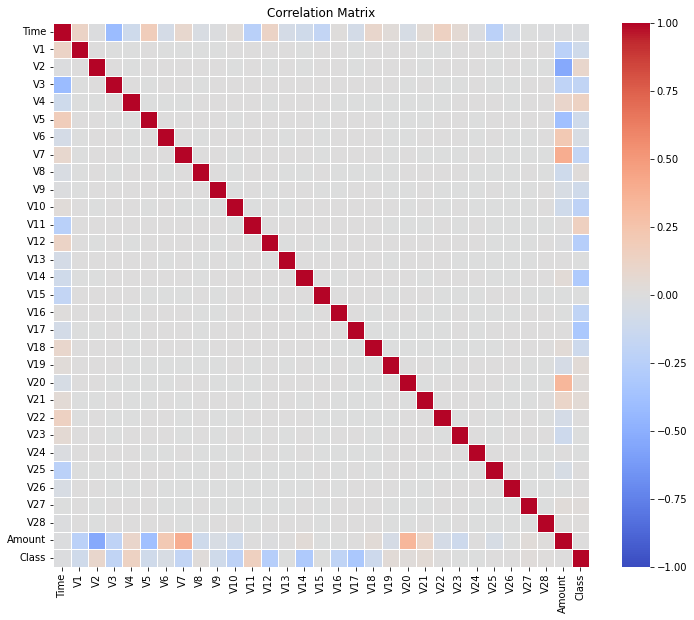

In [10]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1,
vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

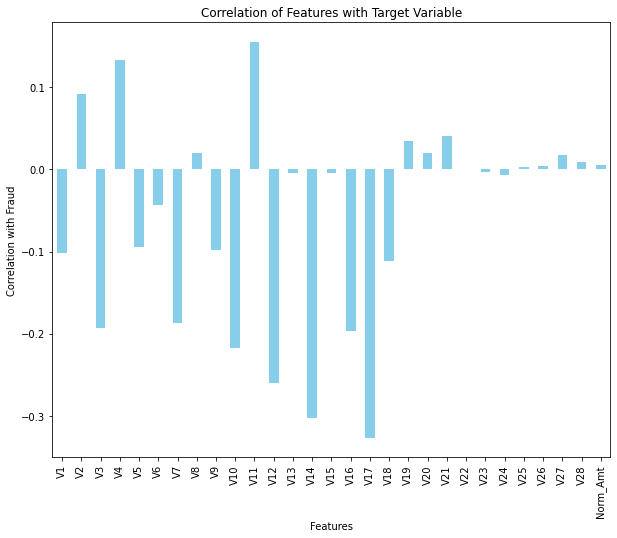

In [19]:
('Class')
corr_with_target = df.corr()['Class'].drop('Class')
plt.figure(figsize=(10, 8))
corr_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation with Fraud')
plt.show()

<b>Normalizing the Amount column and dropping the Time column<b>

In [11]:
df['Norm_Amt']=StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1,1))
df=df.drop(['Time','Amount'],axis=1)

<b>Splitting the dataset into training and testing sets:<b>

In [12]:
X = df.drop('Class', axis=1)
Y = df['Class']

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state = 42)

In [13]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(Y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(Y_test)))

Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962


<b>Trying Logistic Regression with the unbalanced dataset<b>

In [14]:
lr=LogisticRegression(solver='lbfgs', max_iter=2000)
lr.fit(X_train, Y_train)
preds=lr.predict(X_test)
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.57      0.68        98

    accuracy                           1.00     56962
   macro avg       0.92      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 227451 



<b>We implement SMOTE <b> (Synthetic Minority Over-Sampling Technique) for oversampling data

In [16]:
sm=SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

In [17]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0)))

After OverSampling, the shape of train_X: (454902, 29)
After OverSampling, the shape of train_y: (454902,) 

After OverSampling, counts of label '1': 227451
After OverSampling, counts of label '0': 227451


<b>Running Logistic Regression again after SMOTE oversampling<b>

In [18]:
lr1=LogisticRegression(solver='lbfgs', max_iter=2000)
lr1.fit(X_train_res, Y_train_res)
preds1=lr1.predict(X_test)
print(classification_report(Y_test, preds1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

